In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import numpy as np

In [2]:
from utils import CaptionsDataset
from torchvision import transforms

image_fodler = './samples'

image_mean = [0.485, 0.456, 0.406]
image_std  = [0.229, 0.224, 0.225]

transformer = transforms.Compose([
    transforms.Normalize(image_mean, image_std)                
])

dataset = CaptionsDataset(image_folder=image_fodler, transform=transformer)

In [3]:
test_ratio = 0.25
test_size = int(test_ratio * len(dataset))
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [len(dataset) - test_size, test_size]) 

In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128)

In [5]:
from models import OCRModel

In [6]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [7]:
tokens = set(''.join([caption[:-4] for caption in dataset.image_paths]))
tokens.add('0')
tokens = sorted(tokens)
num_tokens = len(tokens)

In [8]:
num_tokens

20

In [9]:
idx_to_token = {i: c for i, c in enumerate(tokens)}
token_to_idx = {c: i for i, c in enumerate(tokens)}


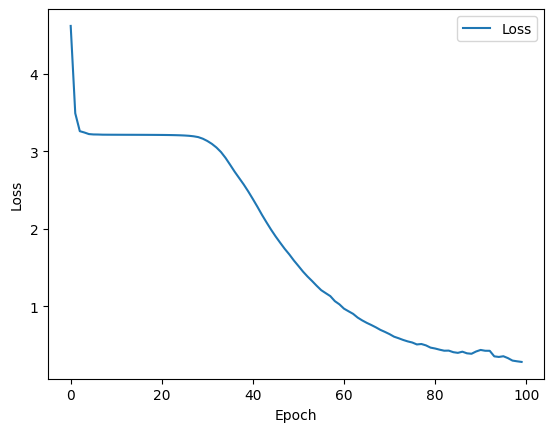

Final Loss: 0.2807680921895163


In [10]:
from utils import train_loop

model = OCRModel().to(device=device)
opt = torch.optim.Adam(model.parameters())
loss_func = nn.CTCLoss()
n_epoch = 100

train_loop(model=model, loss_func=loss_func, opt=opt, n_epoch=n_epoch, token_to_idx=token_to_idx, train_loader=train_loader, device=device)

In [11]:
from torchmetrics import CharErrorRate

In [12]:
CharErrorRate()('me', 'me')

tensor(0.)

In [13]:
from utils import to_caption

for b, c in train_loader:
    with torch.no_grad():
        logits = model(b.to(device)).log_softmax(-1)
        preds = logits.argmax(-1).detach().cpu().numpy()
        captions_pred = to_caption(idx_to_token, preds)
        print(CharErrorRate()(c, captions_pred))

tensor(0.1461)
tensor(0.1748)
tensor(0.1494)
tensor(0.1388)
tensor(0.1405)
tensor(0.1433)
tensor(0.1429)


In [14]:
captions_pred

['36bc22',
 'gwn53',
 '2ceegf',
 'cdmnn8',
 'c8n8c',
 'x75477',
 'nggn26',
 '2b827',
 'ddnmd88',
 '5n7728',
 'n7ff22',
 '23n88',
 '3bx86',
 'b5nmn',
 '6778ww3',
 '7mgmf',
 '7ccgym',
 'n44cpy',
 'fncnb',
 'w6yyne',
 'f2fge',
 'c6wwe6',
 'g247w',
 'nc4yg',
 '3den6',
 'yyn577',
 'x4458w',
 'xfn6n',
 'eppgg3',
 'mmnef5',
 '3d77bdd',
 'wwddccp',
 'effgx5',
 '6bbxwwg',
 '333b222']

In [15]:
c

('36bc2',
 'gwn53',
 '2cegf',
 'cdmn8',
 'c8n8c',
 'x7547',
 'ngn26',
 '2b827',
 'dnmd8',
 '5n728',
 'n7ff2',
 '23n88',
 '3bx86',
 'b5nmm',
 '678w3',
 '7mgmf',
 '7cgym',
 'n4cpy',
 'fncnb',
 'w6yne',
 'f2fge',
 'c6we6',
 'g247w',
 'nc4yg',
 '3den6',
 'yyn57',
 'x458w',
 'xfn6n',
 'eppg3',
 'mnef5',
 '3d7bd',
 'wddcp',
 'efgx5',
 '6bxwg',
 '33b22')

In [16]:
path_to_save = 'lstm_model_2.pkl'
torch.save(model.state_dict(), path_to_save)
